<a href="https://colab.research.google.com/github/JuliaClabunde/Trabalho---IA-/blob/main/Quest%C3%A3o_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install ucimlrepo # Instalando a base de dados

In [11]:
# Imporrtando as bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Carregando o dataset
nursery = fetch_ucirepo(id=76)

# data (as pandas dataframes)
X = nursery.data.features
y = nursery.data.targets

# Convertendo variáveis categóricas para valores numéricos usando one-hot encoding
X_encoded = pd.get_dummies(X)

# Dividindo o conjunto de dados em 10.000 amostras para treinamento e o restante para teste
X_train, X_aval, y_train, y_aval = train_test_split(X_encoded, y, train_size=10000, random_state=42, stratify=y)

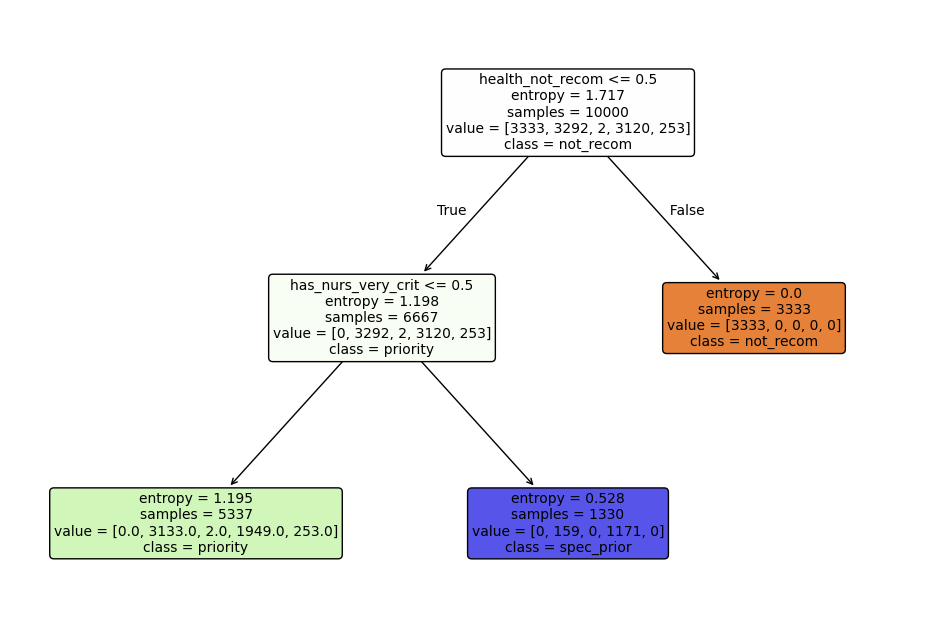

In [20]:
# Letra a)
# Criando o modelo de árvore de decisão com profundidade máxima de 2
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
decision_tree.fit(X_train, y_train) # Treinando o modelo
plt.figure(figsize=(12, 8))  # Configurações figura
tree.plot_tree(decision_tree,
               feature_names=list(X_train.columns), # Nomes das características
               class_names=decision_tree.classes_, # Nomes das classes
               filled=True, # Preenche os nós com cores baseadas na classe
               rounded=True, # Arredonda os cantos dos nós
               fontsize=10) # Tamanho da fonte

plt.show()

In [21]:
# Letra b)
# Avaliando a acurácia do modelo nos dados de teste
accuracy = decision_tree.score(X_aval, y_aval)
print(f"\nAcurácia do modelo: {accuracy:.4f}")
print("."*30)


Acurácia do modelo: 0.7625
..............................


In [17]:
# Extraindo as regras de decisão da árvore obtida na letra A
rules = tree.export_text(decision_tree, feature_names=list(X_train.columns))

# Organizando a saída das regras para uma melhor leitura
formatted_rules = "\nRegras de Decisão da Árvore de Decisão:\n"
formatted_rules += "." * 50 + "\n"
formatted_rules += rules.replace("|---", "  ").replace("|", "").replace("class:", "=> Classe Prevista:")

# Printando as regras de decisão
print(formatted_rules)


Regras de Decisão da Árvore de Decisão:
..................................................
   health_not_recom <= 0.50
      has_nurs_very_crit <= 0.50
         => Classe Prevista: priority
      has_nurs_very_crit >  0.50
         => Classe Prevista: spec_prior
   health_not_recom >  0.50
      => Classe Prevista: not_recom

